## Problem Statement 

Treat this as a classification problem by creating a new binary variable affair 

(did the woman have at least one affair?) 

and trying to predict the classification for each woman.

### Description of Dataset


The dataset is the affairs dataset that comes with Statsmodels. 
It was derived from a survey of women in 1974 by Redbook magazine, 
inwhich married women were asked about their participation in extramarital affairs. 
More information about the study is available in a 1978 paper from the Journal of Political Economy

The dataset contains 6366 observations of 9 variables:
    
rate_marriage: woman's rating of her marriage (1 = very poor, 5 =very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)

educ:levelOfEducation (9=grade school,12=high school,14=some college,16=college graduate,

                       17=some graduate school, 20= advanced degree)
                       
occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 

                                3 = "white collar", 4 =teacher/nurse/writer/technician/skilled, 
                                
                                5 = managerial/business, 6 = professional with advanced degree)
                                
occupation_husb: husband's occupation (same coding as above)
    
affairs: time spent in extra-marital affairs

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
#from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## load the dataset

In [2]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
# add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [5]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [6]:
# summarize the class distribution
target = dta['affair']
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=2053, Percentage=32.249%
Class=0, Count=4313, Percentage=67.751%


In [7]:
dta_cat = dta[['rate_marriage','religious','educ','occupation', 'occupation_husb']]
dta_num = dta[['age', 'yrs_married', 'children','affairs']]

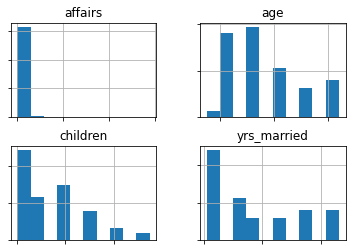

In [8]:
#create histogram for numerical features

ax = dta_num.hist()
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
# show the plot
plt.show()

we might have to scale these features for standardisation

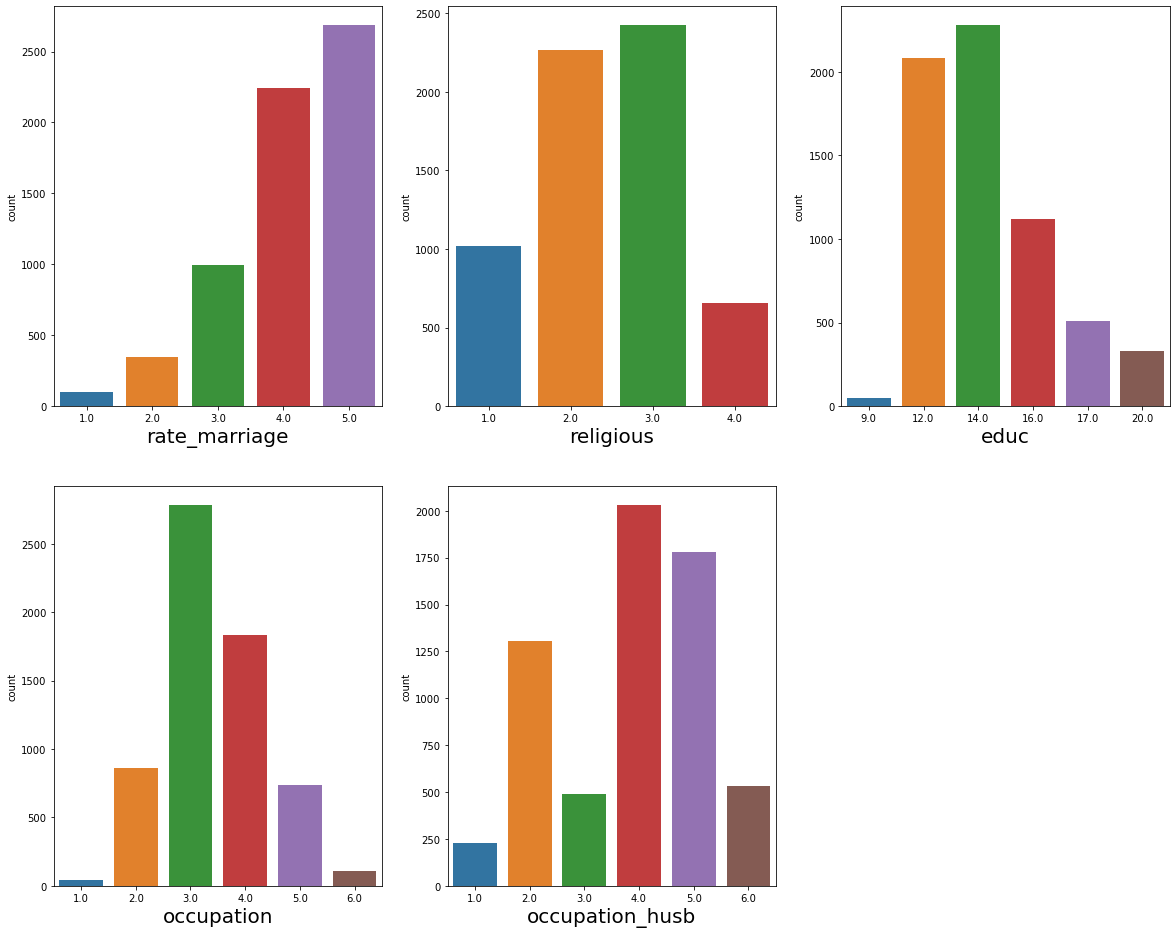

In [9]:
# let's visualise categorical features
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta_cat:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(dta[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

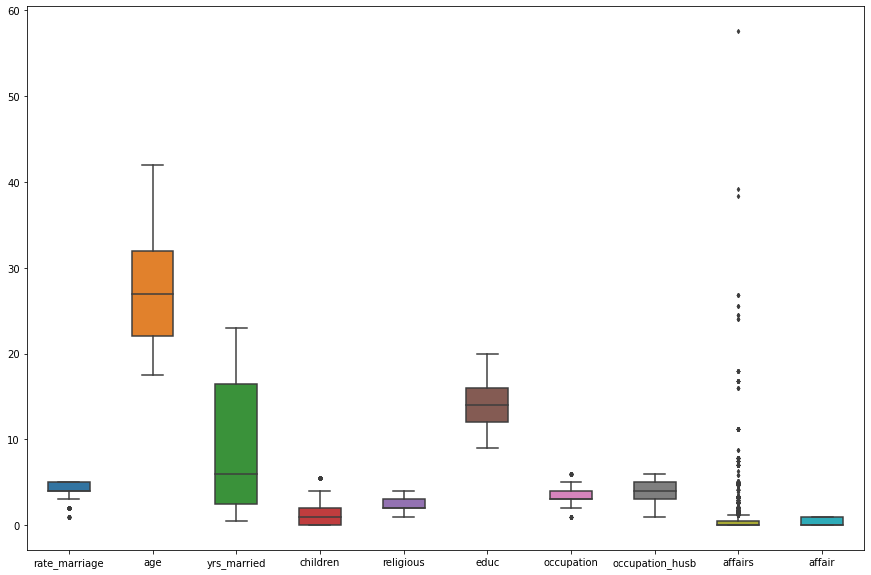

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)


In [11]:
print("The distribution of rate marriage")
print(dta['rate_marriage'].value_counts())
print("The distribution of children")
print(dta['children'].value_counts())
print("The distribution of occupation")
print(dta['occupation'].value_counts())


The distribution of rate marriage
5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64
The distribution of children
0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64
The distribution of occupation
3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64


In [12]:
# Lets distribute the target and input features

y = dta['affair']
X = dta.drop(columns = ['affair'])


In [13]:
X

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


Next, we need to select all input variables that are categorical, 

then apply a one-hot encoding and leave the numerical variables untouched.

This can be achieved using a ColumnTransformer and 

defining the transform as a OneHotEncoder applied only to the column indices for categorical variables.

In [14]:

cat_ix = ['rate_marriage','religious','educ','occupation', 'occupation_husb']
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(sparse=False), cat_ix)], remainder='passthrough')


In [15]:
X_transform = columnTransformer.fit_transform(X)
X_transform.shape

(6366, 31)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transform)
X_scaled.shape

(6366, 31)

In [17]:
y.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)


In [19]:
x_train.shape

(4774, 31)

In [20]:
#max_iterations default value is changed as it was coming out with an exception

log_reg = LogisticRegression(max_iter=500)

log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [21]:
y_pred = log_reg.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9579145728643216

In [23]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1083,    1],
       [  66,  442]], dtype=int64)

In [24]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [25]:
accuracy = (true_positive + true_negative)/(true_positive + true_negative+false_positive+false_negative)
accuracy

0.9579145728643216

In [26]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9990774907749077

In [27]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9425587467362925

In [28]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9699955217196596

In [29]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.934578115466194

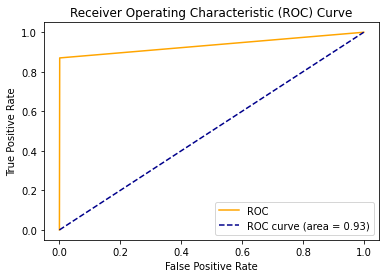

In [30]:
#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [31]:
# lets check some predictins randomly
y_test[20:25]


5252    0
3355    0
1540    1
4008    0
3785    0
Name: affair, dtype: int32

In [32]:
y_pred[20:25]

array([0, 0, 1, 0, 0])

In [33]:
### Lets convert the models into pickle files

In [34]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.pkl', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('columnTransformer.pkl', 'wb') as f:
    pickle.dump(columnTransformer,f)
    
with open('StandardScaler1.pkl', 'wb') as f:
    pickle.dump(scaler,f)


In [40]:
filename1 = 'modelForPrediction.pkl'
filename2 = 'columnTransformer.pkl'
filename3 = 'StandardScaler1.pkl'
loaded_model1 = pickle.load(open(filename1, 'rb')) 
loaded_model2 = pickle.load(open(filename2, 'rb')) 
loaded_model3 = pickle.load(open(filename3, 'rb')) 

In [41]:
dta_predict = sm.datasets.fair.load_pandas().data

In [42]:
a = loaded_model2.transform(dta_predict)
a.shape

(6366, 31)

In [43]:
b = loaded_model3.transform(a)

In [45]:
c = loaded_model1.predict(b)

In [59]:
len(dta)

6366

In [77]:
wrong_cnt = 0
i = 0
while (i < len(dta)-1):
    
    if c[i] != dta['affair'][i]:
        wrong_cnt = wrong_cnt + 1
    i = i + 1


In [79]:
wrong_cnt

264